# The goal of this notebook to develop a machine learning model that can predict the reduction potentials of molecules based on the molecular fingerprints and descriptors

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import Chemfunctions as chemfun
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit.Chem as Chem

# Download data from the github repo

In [4]:
url="https://raw.githubusercontent.com/akashjn/DataScience/main/Data/BTZ_5442mols_smiles_redpot.csv"
df=pd.read_csv(url)
# df=df.sample(n=1000,ignore_index=True)
# df=df[:1000]
df.head()

,SMILES,ERed
0,Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C,1.27
1,CCN1CCN(CCOC)c2c1cc1nsnc1c2C,1.27
2,CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C,1.24
3,CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21,1.22
4,CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C,1.20


# Find duplicate SMILES in the df
## A molecule can be represented by more than one SMILES string, so let's re-write SMILES in the canonical (standard) form and remove any duplicate SMILES

In [5]:
df=chemfun.remove_duplicate_smiles(df=df,smi="SMILES")

Removed 0 duplicate SMILES from the given df


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  5442 non-null   object 
 1   ERed    5442 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.2+ KB


# Data Exploration: Let's check the distribution of ERed
- df has the reduction potentials of 5442 molecules 

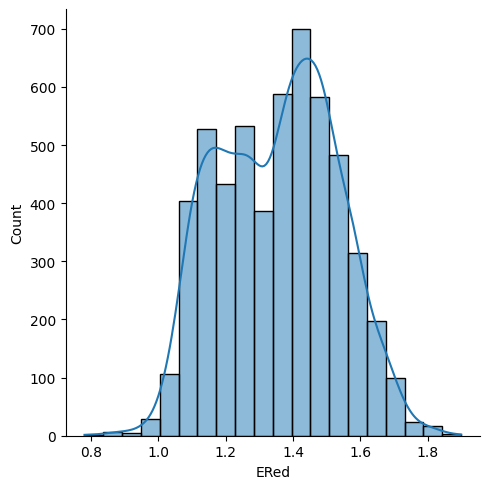

In [7]:
sns.displot(df,x="ERed",kde=True,bins=20)
plt.show()

In [8]:
df.ERed.describe()

count    5442.000000
mean        1.353532
std         0.176192
min         0.780000
25%         1.210000
50%         1.370000
75%         1.490000
max         1.900000
Name: ERed, dtype: float64

**In the dataset, the mean, std and median ERed of 5442 molecules is 1.35, 0.18, and 1.37, respectively**

# Represent molecules in terms of the molecular descriptors 

## We will use the rdkit library to generate molecular descriptors
- RDkit_descriptors() is a function in the Chemfunctions.py

In [9]:
# call function
Mol_descriptors,desc_names = chemfun.RDkit_descriptors(smiles=df.SMILES)
df_rdkit = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.456023,1.020889,4.456023,1.020889,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.300000,2.100000,2.850000,32.140682,10.056719,2.243910,-2.382209,2.387529,-2.421053,6.996096,0.412244,2.063612,621.296943,14.275656,12.550094,13.366590,9.575387,6.943478,7.673774,5.713135,6.241583,3.990306,4.532875,2.790050,3.370123,-1.40,50883.396945,13.577001,5.179478,2.226066,123.668114,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,27.085448,38.790149,23.102960,0.000000,34.136361,0.0,13.64699,0.0,6.923737,57.121861,11.629819,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.969031,0.000000,6.923737,5.563451,6.066367,0.0,11.033401,0.0,35.50,0.0,0.0,0.0,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,0.000000,8.854512,1.301269,7.048598,0.000000,5.955116,0.0,2.183519,0.000000,6.418928,6.404726,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,3,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.243940,0.748371,5.243940,0.748371,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.300000,2.100000,2.850000,32.140682,10.052673,2.253246,-2.390295,2.392744,-2.423841,6.996097,0.204850,2.122519,612.484865,14.112520,12.218235,13.034732,9.757550,7.005867,7.736164,5.060772,5.589220,3.984172,4.526742,2.920064,3.500137,-1.40,63046.529091,13.577001,5.535354,2.125124,123.021825,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.747

# Data Cleaning

1. Remove columns with NaN
2. Remove duplicate columns
3. Remove columns with unique values
4. Remove columns with low std
5. Remove highly correlated features


In [10]:
print(f'Shape of the df_rdkit before cleaning: {df_rdkit.shape}')
df_rdkit=chemfun.remove_nan_columns(df=df_rdkit)
df_rdkit=chemfun.remove_duplicate_columns(df=df_rdkit)
df_rdkit=chemfun.remove_columns_uniquevalues(df=df_rdkit)
df_rdkit=chemfun.remove_columns_low_std(df=df_rdkit)
df_rdkit=chemfun.remove_corr_features(df=df_rdkit,corr_cutoff=0.9)
print(f'Shape of the df_rdkit after cleaning: {df_rdkit.shape}')

Shape of the df_rdkit before cleaning: (5442, 208)
Removed 0 columns with nan
Removed 0 duplicate columns
Removed 84 columns values with a unique value
Removed 27 columns with std < 0.3 
Dropped 38 features with correlation coeff. > 0.90
Shape of the df_rdkit after cleaning: (5442, 59)


# With some data cleaning we were able to reduce the number of descriptors from 208 to 10

## we removed features with pearson corr. coeff. > 0.5 to reduce the number of features and better visulaization. 

In [11]:
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MolWt,BCUT2D_MRLOW,BertzCT,Chi3n,Ipc,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA6,TPSA,EState_VSA1,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumRotatableBonds,MolLogP,fr_NH0,fr_Ndealkylation1,fr_aryl_methyl,fr_bicyclic,fr_methoxy,fr_unbrch_alkane
0,4.456023,1.020889,291.424,0.412244,621.296943,3.990306,50883.396945,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27.085448,38.790149,23.102960,0.000000,34.136361,13.64699,0.0,6.923737,57.121861,11.629819,0.0,60.969031,0.000000,6.923737,6.066367,35.50,0.0,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,7.048598,0.000000,5.955116,0.0,0.000000,6.418928,6.404726,0,0,1,1,3,1.81752,5,2,1,2,0,0
1,5.243940,0.748371,292.408,0.204850,612.484865,3.984172,63046.529091,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,19.913841,38.852275,29.709842,4.736863,34.136361,8.74708,0.0,13.847474,49.695525,11.629819,0.0,48.642785,4.736863,6.923737,6.066367,41.49,0.0,0.0,0.000000,43.819309,28.666411,7.109798,0.0,38.460741,4.836841,0.000000,5.871127,0.0,0.000000,9.134667,1.753581,0,0,1,1,4,2.29242,4,1,1,2,1,0
2,4.487068,0.475834,291.424,0.656189,621.296943,3.855243,53230.799764,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26.837579,32.723782,28.790346,0.000000,39.823748,8.74708,0.0,26.813052,41.798549,6.066367,0.0,41.470862,0.000000,0.000000,6.066367,44.29,0.0,0.0,6.041841,36.355057,23.102960,0.000000,0.0,57.748939,4.777731,3.506019,5.643154,0.0,0.000000,9.584423,2.150651,1,0,1,1,3,2.78770,4,1,0,2,0,0
3,4.513689,0.897986,305.451,0.698384,623.796657,4.029118,104319.097411,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,6.923737,26.334663,32.723782,28.790346,0.000000,39.823748,8.74708,0.0,27.192033,47.840390,6.066367,0.0,41.470862,0.000000,0.000000,6.066367,44.29,0.0,0.0,0.000000,55.865391,23.102960,0.000000,0.0,50.701267,4.943843,3.533649,5.788754,0.0,1.157225,11.767929,0.000000,1,0,1,1,5,3.17940,4,1,0,2,0,0
4,4.512897,0.476118,305.451,0.643501,636.270840,4.100912,91642.042480,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,33.761316,32.220866,28.790346,0.000000,39.823748,8.74708,0.0,33.736790,41.295634,6.066367,0.0,40.967946,0.000000,0.000000,6.066367,44.29,0.0,0.0,6.041841,42.899813,23.102960,0.000000,0.0,57.625004,4.922731,3.530111,5.724360,0.0,0.000000,12.885515,0.000000,1,0,1,1,4,3.17780,4,1,0,2,0,0


TODO: Scale data, and Train a linear regression model

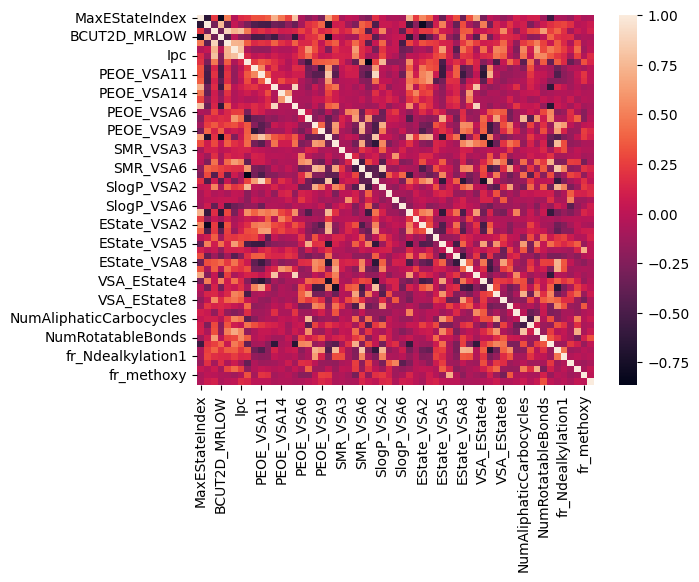

In [12]:
sns.heatmap(df_rdkit.corr())
plt.show()

# Let's make pairplot to visualize the relationship between independent variables

In [13]:
# sns.pairplot(data=df_rdkit,diag_kind='kde')
# plt.show()

# Let's find out which of the features have normal distribution with the Shapiro-Wilk Test

In [14]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

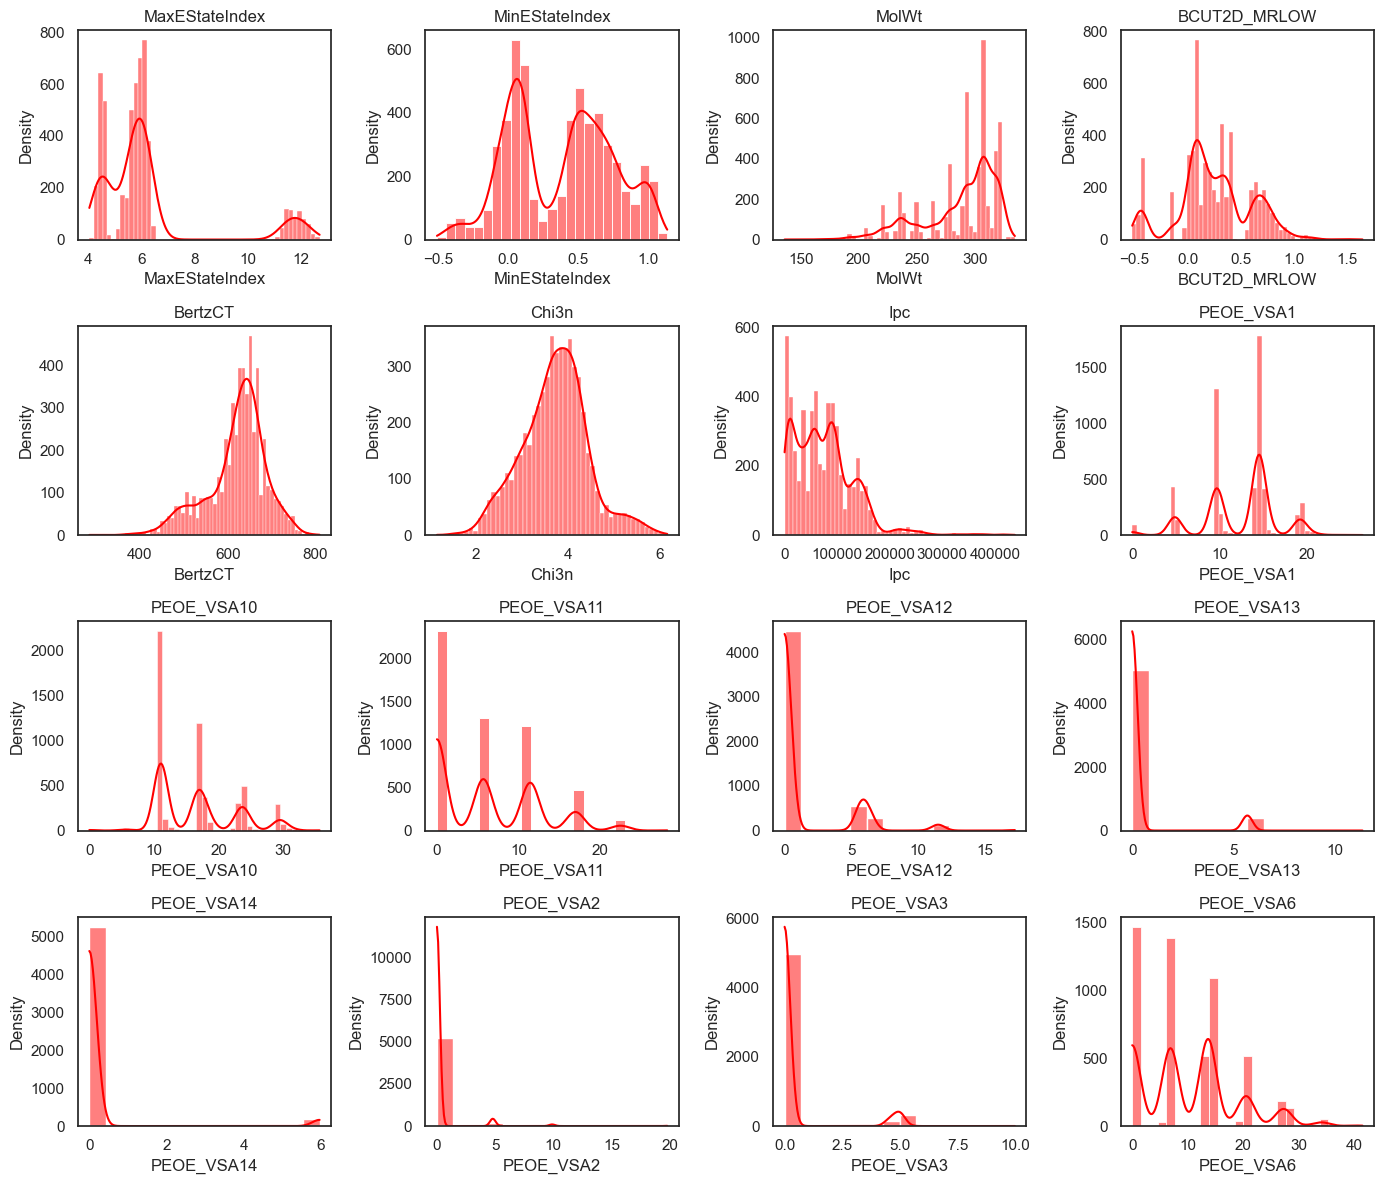

In [15]:
nr_rows = 4
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(df_rdkit.columns.to_list()):
            col=df_rdkit.columns.to_list()[i]
            sns.histplot(df_rdkit[col],ax=axs[r][c],color="red",kde=True)
            axs[r][c].set_xlabel(col)
            axs[r][c].set_ylabel(f'Density')
            axs[r][c].set_title(col)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# # plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

# None of the features look normally distributed from the hist/kde plots

In [16]:
# import importlib
# importlib.reload(chemfun)

# Let's try statistical tests

## let's confirm the hypothesis that our distribution is not normal. by running different normality tests, such as D'Agostino-Pearson , Shapiro-Wilk and Anderson tests.

In [17]:
df_=chemfun.check_normality_feat(df=df_rdkit,alpha=0.05,test="shapiro")
df_["Normal_dist"].sum()

Shapiro-Wilk test of normality
0 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'W_stat', 'p-value'] columns


c:\Users\jaina\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0

In [18]:
df_=chemfun.check_normality_feat(df=df_rdkit,alpha=0.05,test="agostino")
df_["Normal_dist"].sum()

D'Agostino K2 test of normality
1 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'K2_stat', 'p-value'] columns


1

# From both the statistical tests, we find that none of the selected features are normally distributed
*we will apply log, cubic root transform to features after training the linear reg. (baseline) model*

# Feature selection 

*We will use the p-values of individual regression coeff to select the imp features*

To get the overall F-statistic of the model and the p-values we require the model summary. Unfortunately, we don't get that from the sklearn model. So we will use statsmodels.

[Ref1: Implement OLS in sm](https://www.statology.org/sklearn-linear-regression-summary/)

[Ref2: How to interpret the linear regression p-values](https://www.statology.org/linear-regression-p-value/)

# 1. with sklearn

In [19]:
from sklearn.linear_model import LinearRegression

df_rdkit_scaled=chemfun.do_scaling(xtrain=df_rdkit) # Standard Scaling 

model=LinearRegression()

model.fit(X=df_rdkit_scaled,y=df["ERed"])

print(f"intercept = {(model.intercept_):0.2f},\nmodel coeff. = {model.coef_},\nR^2 = {(model.score(X=df_rdkit_scaled,y=df['ERed'])):0.2f}")

test data is not provided, returning only scaled train data
intercept = 1.35,
model coeff. = [ 3.95216104e-02 -4.72014417e-03  1.61634273e+02  2.56108456e-02
  1.45798798e-02  1.33026092e-02  2.54432190e-02  2.10266844e+11
  3.00956118e+11  3.08875515e+11  1.37404438e+11  7.21323134e+10
  5.34228819e+10  6.86010422e+10  6.76476568e+10  4.17536206e+11
  6.62609549e+11  5.10175399e+11  3.73513219e+11 -2.73437455e+11
 -3.20521623e+11 -4.80742808e+10 -1.22871472e+11 -7.55331692e+11
 -7.56080815e+11 -2.32222042e+11 -2.94750948e+11  2.54500515e+00
  5.91522990e-01  1.96776044e-01 -7.36903332e+00  1.56550256e+02
 -2.86820367e-03  2.89916992e-02  9.63134766e-02  1.00646973e-01
  1.24801636e-01  3.37219238e-02  4.77294922e-02  1.00646973e-01
 -1.25946045e-01  2.75310516e-01  4.27246094e-04 -3.20739746e-02
  6.70776367e-02  4.27490234e-01  2.81372070e-01 -1.19235474e+02
 -3.79235311e+10 -2.26746782e+10  3.23730502e+10 -8.39233398e-03
  4.56560421e+00 -6.46465759e+01  1.26647949e-02 -2.68554688e-

In [20]:
import statsmodels.api as sm

#define response variable
y=df["ERed"]

#define predictor variables
x=df_rdkit_scaled

#add constant to predictor variables
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                   ERed   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     367.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:11:11   Log-Likelihood:                 6044.5
No. Observations:                5442   AIC:                        -1.197e+04
Df Residuals:                    5384   BIC:                        -1.159e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**With statsmodel we get detailed summary. we will use the P>|t| values for feature selection**

# Split the dataset into training and test datasets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_rdkit,df["ERed"],test_size=0.3, random_state=42)
print(f'X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}, y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}')

X_train.shape = (3809, 59), X_test.shape = (1633, 59), y_train.shape = (3809,), y_test.shape = (1633,)


# Do scaling

In [22]:
X_train,X_test=chemfun.do_scaling(xtrain=X_train,xtest=X_test)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

returning scaled train and test data


# Feature Selection based on the p-values
## H0 (null hypothesis) all features have a statistically significant relationship with the target variable

*After implementing the linear regression with all features, if we find that the p-value of any feature is smaller than the alpha = 0.05 (95% confidence interval) or p < 0.05, then it suggests that the feature has a statistically significant relationship with the target variable at an alpha level of 0.05*

[Interpretation of the p-value test in linear regression](https://medium.com/nerd-for-tech/hypothesis-testing-on-linear-regression-c2a1799ba964)

In [23]:
alpha = 0.05

features=X_train.columns
print(f'initial number of features = {len(features)}')

y=y_train

for iter in np.arange(5):
    
    x=X_train.loc[:,features]
    x=sm.add_constant(x)

    model=sm.OLS(y,x).fit()
    
    p_values = model.summary2().tables[1]['P>|t|'][1:] < alpha # 0 the element is for the constant 
    
    # remove columns with p-values > 0.05
    features=features[p_values]
    print(f'iter = {iter}, number of features left = {len(features)}')

print(f'features left = {features}')


initial number of features = 59
iter = 0, number of features left = 49
iter = 1, number of features left = 48
iter = 2, number of features left = 48
iter = 3, number of features left = 48
iter = 4, number of features left = 48
features left = Index(['MaxEStateIndex', 'MolWt', 'BCUT2D_MRLOW', 'Ipc', 'PEOE_VSA1',
       'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4',
       'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA2',
       'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA6', 'TPSA', 'EState_VSA3',
       'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'VSA_EState2',
       'VSA_EState3', 'VSA_EState5', 'VSA_EState7', 'VSA_EState8',
       'VSA_EState9', 'NHOHCount', 'NumAliphaticCarbocycles',
       'NumAliphaticRings', 'MolLogP', 'fr_NH0', 'fr_Ndealkylation1',
       'fr_bicyclic', 'fr_methoxy', 'fr_unbrch_alkane'],
     

# Linear Model

Let's compare the performance of the linear regression model with all 41 and 24 selected features

In [24]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression().fit(X_train,y_train)
model2=LinearRegression().fit(X_train.loc[:,features],y_train)



In [25]:
ytest_pred1=model1.predict(X_test)
ytest_pred2=model2.predict(X_test.loc[:,features])

In [26]:
from sklearn.metrics import mean_squared_error as mse

Train, R^2 model1 = 0.80
Test, R^2 model1 = 0.78


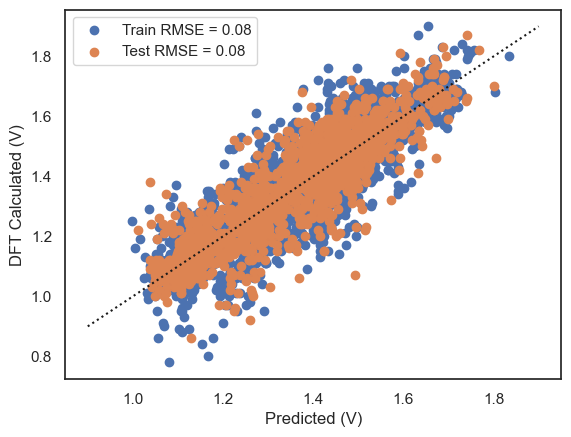

In [27]:
print(f'Train, R^2 model1 = {model1.score(X=X_train,y=y_train):0.2f}')
print(f'Test, R^2 model1 = {model1.score(X=X_test,y=y_test):0.2f}')
plt.scatter(model1.predict(X_train),y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,model1.predict(X_train))):0.2f}")
plt.scatter(ytest_pred1,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred1)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()

Train, R^2 model2 = 0.80
Test, R^2 model2 = 0.78


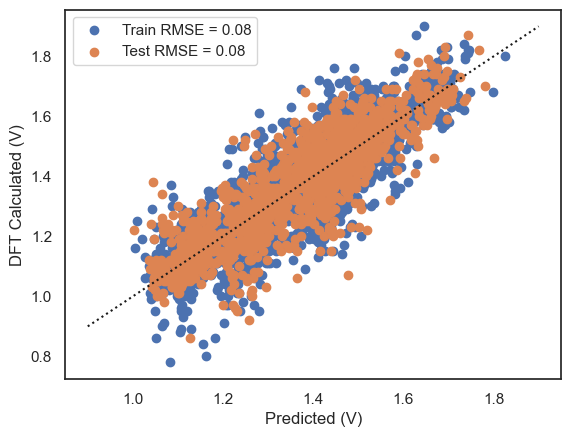

In [28]:
print(f'Train, R^2 model2 = {model2.score(X=X_train.loc[:,features],y=y_train):0.2f}')
print(f'Test, R^2 model2 = {model2.score(X=X_test.loc[:,features],y=y_test):0.2f}')
plt.scatter(model2.predict(X_train.loc[:,features]),y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,model2.predict(X_train.loc[:,features]))):0.2f}")
plt.scatter(ytest_pred2,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred2)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()

# Residual

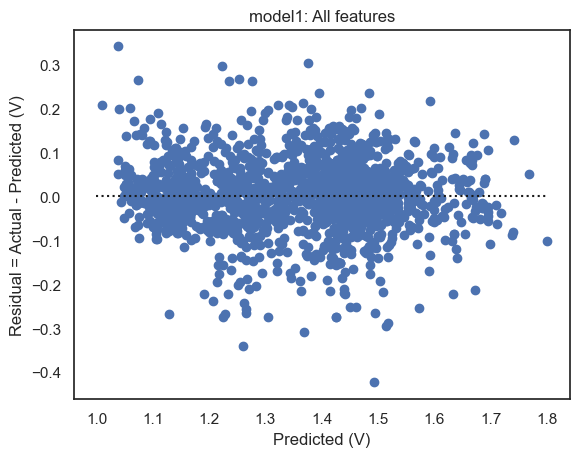

In [29]:
plt.scatter(ytest_pred1,(y_test-ytest_pred1))
plt.plot([1,1.8],[0,0],':k')
plt.title('model1: All features')
plt.xlabel('Predicted (V)')
plt.ylabel('Residual = Actual - Predicted (V)')
plt.show()

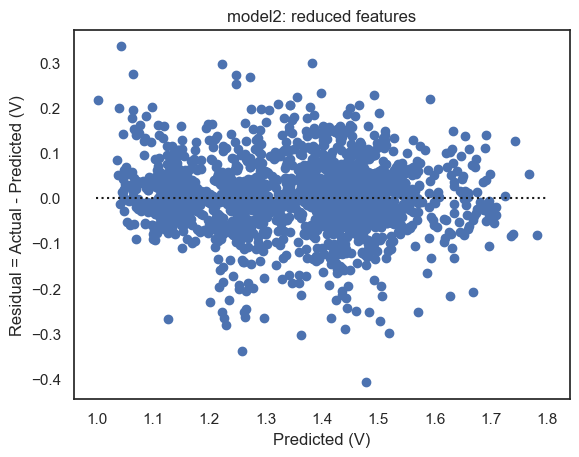

In [30]:
plt.scatter(ytest_pred2,(y_test-ytest_pred2))
plt.plot([1,1.8],[0,0],':k')
plt.title('model2: reduced features')
plt.xlabel('Predicted (V)')
plt.ylabel('Residual = Actual - Predicted (V)')
plt.show()

# Errors/Residuals are randomly distributed

In [31]:
# from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
rfe = RFECV(estimator=LinearRegression(), cv=5, step=1)

rfe.fit(X_train, y_train)
print(f"features selected with the RFECV using the linear regression")
rfe.feature_names_in_[rfe.support_]

features selected with the RFECV using the linear regression


array(['PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10',
       'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9',
       'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings'], dtype=object)

In [32]:
len(rfe.feature_names_in_[rfe.support_])

22

Train, R^2 model2 = 0.74
Test, R^2 model2 = 0.74


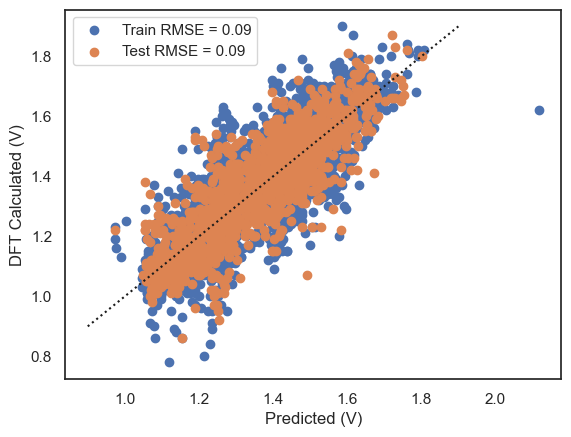

In [33]:
features=rfe.feature_names_in_[rfe.support_]
model3=LinearRegression().fit(X_train.loc[:,features],y_train)
ytest_pred3=model3.predict(X_test.loc[:,features])
ytrain_pred3=model3.predict(X_train.loc[:,features])
print(f'Train, R^2 model2 = {model3.score(X=X_train.loc[:,features],y=y_train):0.2f}')
print(f'Test, R^2 model2 = {model3.score(X=X_test.loc[:,features],y=y_test):0.2f}')
plt.scatter(ytrain_pred3,y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,ytrain_pred3)):0.2f}")
plt.scatter(ytest_pred3,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred3)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()

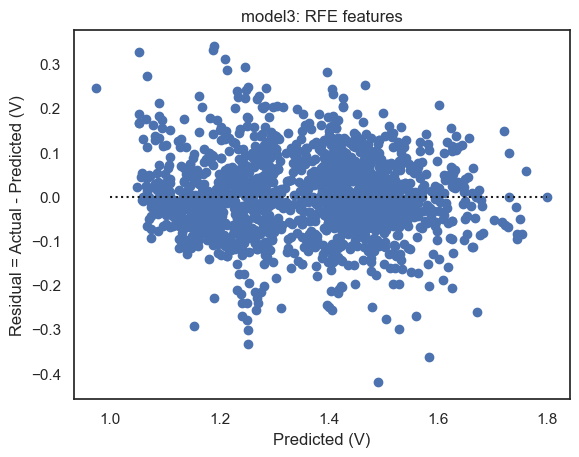

In [34]:
plt.scatter(ytest_pred3,(y_test-ytest_pred3))
plt.plot([1,1.8],[0,0],':k')
plt.title('model3: RFE features')
plt.xlabel('Predicted (V)')
plt.ylabel('Residual = Actual - Predicted (V)')
plt.show()

# Use CV
# Use LASSO and see the feature selection
## Note that MW got dropped despite having a large coeff. in the linear reg. 

# Compare the performance of other models 
- use pipeline
- use CV
- tune hyperparameter

In [35]:
from sklearn.linear_model import LassoCV

model4=LassoCV(eps=0.01,n_alphas=50,cv=5,random_state=2).fit(X_train,y_train)

Train, R^2 model4 = 0.78
Test, R^2 model4 = 0.76


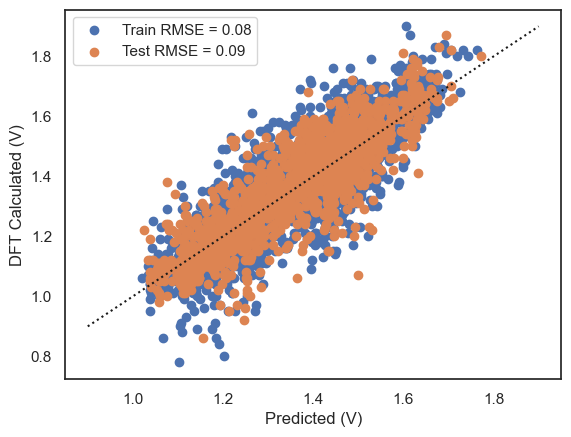

In [36]:
ytest_pred4=model4.predict(X_test)
ytrain_pred4=model4.predict(X_train)
print(f'Train, R^2 model4 = {model4.score(X=X_train,y=y_train):0.2f}')
print(f'Test, R^2 model4 = {model4.score(X=X_test,y=y_test):0.2f}')
plt.scatter(ytrain_pred4,y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,ytrain_pred4)):0.2f}")
plt.scatter(ytest_pred4,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred4)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()

In [37]:
len(model4.feature_names_in_[model4.coef_!=0])

32

In [38]:
model4.feature_names_in_[model4.coef_!=0]

array(['MinEStateIndex', 'Chi3n', 'Ipc', 'PEOE_VSA1', 'PEOE_VSA11',
       'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA6',
       'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA3', 'SMR_VSA5',
       'SMR_VSA9', 'SlogP_VSA2', 'SlogP_VSA6', 'EState_VSA3',
       'EState_VSA8', 'VSA_EState2', 'VSA_EState3', 'VSA_EState8',
       'VSA_EState9', 'NumAliphaticHeterocycles', 'NumAliphaticRings',
       'NumRotatableBonds', 'fr_NH0', 'fr_Ndealkylation1',
       'fr_aryl_methyl', 'fr_bicyclic', 'fr_methoxy'], dtype=object)

## We will use the features selected by the model4 (LassoCV)

# Use pipeline with SVM

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [40]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_rdkit,df["ERed"],test_size=0.3, random_state=42)
print(f'X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}, y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}')

X_train.shape = (3809, 59), X_test.shape = (1633, 59), y_train.shape = (3809,), y_test.shape = (1633,)


In [41]:
svr = SVR()
pipe = Pipeline([("scaler", StandardScaler()), ("svr", svr)])
param_grid = {
    "svr__kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C':np.arange(1,10,2)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,return_train_score=True,scoring='neg_mean_squared_error',cv=RepeatedKFold(n_splits=5, n_repeats=3,random_state=11))
search.fit(X_train,y_train)


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=11),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': array([1, 3, 5, 7, 9]),
                         'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
search.best_params_, search.best_score_

({'svr__C': 1, 'svr__kernel': 'rbf'}, -0.00685929549604564)

In [43]:
model5=search.best_estimator_
model5.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=1))])

Train, R^2 model5 = 0.84
Test, R^2 model5 = 0.79


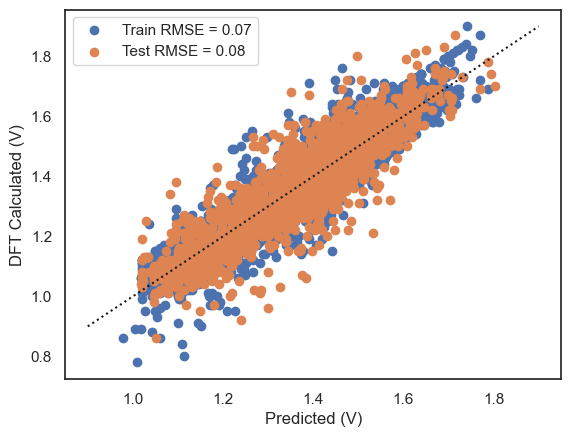

In [44]:
ytest_pred5=model5.predict(X_test)
ytrain_pred5=model5.predict(X_train)

print(f'Train, R^2 model5 = {model5.score(X=X_train,y=y_train):0.2f}')
print(f'Test, R^2 model5 = {model5.score(X=X_test,y=y_test):0.2f}')
plt.scatter(ytrain_pred5,y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,ytrain_pred5)):0.2f}")
plt.scatter(ytest_pred5,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred5)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()


# Overfitting with SVR

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
gbr = GradientBoostingRegressor(learning_rate=0.01,max_depth=3,n_estimators=100)
pipe = Pipeline([("scaler", StandardScaler()), ("gbr", gbr)])
param_grid = {
    "gbr__learning_rate": np.logspace(-2, 0, 2),
    'gbr__max_depth':range(1,3),
    'gbr__n_estimators':range(100,300,100)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,return_train_score=True,scoring='neg_mean_squared_error',cv=RepeatedKFold(n_splits=5, n_repeats=3,random_state=11))
search.fit(X_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=11),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gbr',
                                        GradientBoostingRegressor(learning_rate=0.01))]),
             n_jobs=-1,
             param_grid={'gbr__learning_rate': array([0.01, 1.  ]),
                         'gbr__max_depth': range(1, 3),
                         'gbr__n_estimators': range(100, 300, 100)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
search.best_params_, search.best_score_

({'gbr__learning_rate': 1.0, 'gbr__max_depth': 1, 'gbr__n_estimators': 200},
 -0.006387824104886004)

In [48]:
model6=search.best_estimator_
model6.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr',
                 GradientBoostingRegressor(learning_rate=1.0, max_depth=1,
                                           n_estimators=200))])

Train, R^2 model6 = 0.84
Test, R^2 model6 = 0.80


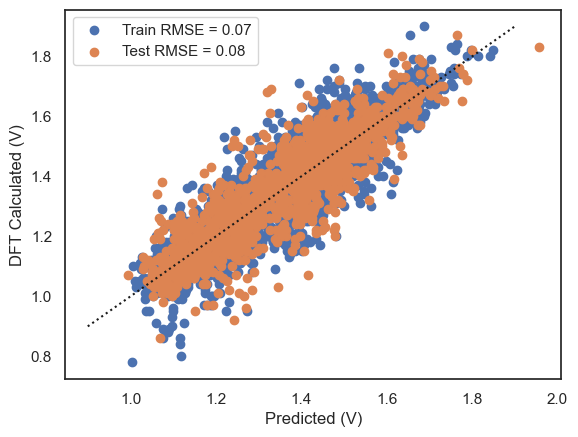

In [49]:
ytest_pred6=model6.predict(X_test)
ytrain_pred6=model6.predict(X_train)

print(f'Train, R^2 model6 = {model6.score(X=X_train,y=y_train):0.2f}')
print(f'Test, R^2 model6 = {model6.score(X=X_test,y=y_test):0.2f}')
plt.scatter(ytrain_pred6,y_train,label=f"Train RMSE = {np.sqrt(mse(y_train,ytrain_pred6)):0.2f}")
plt.scatter(ytest_pred6,y_test,label=f"Test RMSE = {np.sqrt(mse(y_test,ytest_pred6)):0.2f}")
plt.plot([0.9,1.9],[0.9,1.9],':k')
plt.xlabel('Predicted (V)')
plt.ylabel('DFT Calculated (V)')
plt.legend()
plt.show()


## Less overfitting with GBR than SVR
## GBR has slightly better generalization than the Linear Regresssion, and SVR

# TODO: 
- Test several models with pipeline and loop
- Compare the performance of all models
- Implement NN with tensorflow

In [50]:
import tensorflow as tf

# Linear model using a neural network with keras
[Ref](https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/)

In [116]:
input_shape=[X_train.shape[1]]

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 1)                 60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


units=1 created 1 neuron (y=mx+c; where x is a vector)

let's make a 3 layer network with 1 input layer, 1 hidden layer1 with 64 units, and 1 output layer.

In [117]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=32, activation='relu'),
	tf.keras.layers.Dense(units=16, activation='sigmoid'),
	tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                3840      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________


In [118]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae')


In [119]:
from sklearn.model_selection import train_test_split

# train_x, val_x, train_y, val_y = train_test_split(X_train,y_train,test_size=0.3, random_state=21)
train_x, val_x, train_y, val_y = train_test_split(df_rdkit,df["ERed"],test_size=0.3, random_state=21)
print(f'train_x.shape = {train_x.shape}, val_x.shape = {val_x.shape}, train_y.shape = {train_y.shape}, val_y.shape = {val_y.shape}')


train_x,val_x=chemfun.do_scaling(xtrain=train_x,xtest=val_x)
# train_y=train_y.to_numpy()
# val_y=val_y.to_numpy()

train_x.shape = (3809, 59), val_x.shape = (1633, 59), train_y.shape = (3809,), val_y.shape = (1633,)
returning scaled train and test data


In [120]:
losses = model.fit(train_x, train_y,

				validation_data=(val_x,val_y),
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=128,
				epochs=30, # total epoch

				)


Epoch 1/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6812 - val_loss: 0.1668
Epoch 2/30
30/30 [==============================] - 0s 3ms/step - loss: 0.1444 - val_loss: 0.1086
Epoch 3/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 0.0835
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0758 - val_loss: 0.0725
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0677 - val_loss: 0.0667
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0636 - val_loss: 0.0620
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0605 - val_loss: 0.0620
Epoch 8/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0593 - val_loss: 0.0593
Epoch 9/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0576 - val_loss: 0.0578
Epoch 10/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0570
Epoch 11/30
30/30 [

In [121]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(val_x.iloc[0:3, :])


1/1 [==============================] - 0s 49ms/step


array([[1.6264783],
       [1.5186822],
       [1.4099784]], dtype=float32)

In [122]:
val_y.iloc[0:3]

732     1.66
3753    1.44
4475    1.45
Name: ERed, dtype: float64

<AxesSubplot: >

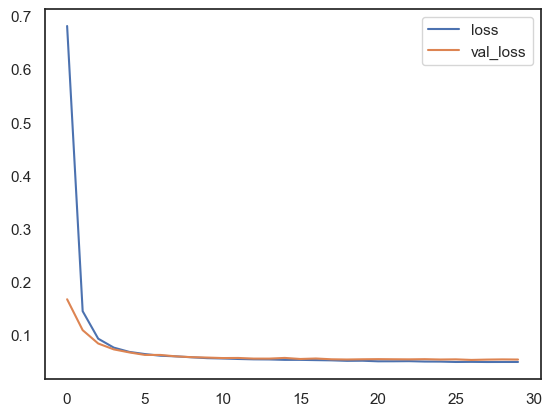

In [123]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()


In [124]:
val_y.max()

1.9

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


52/52 [==============================] - 0s 1ms/step


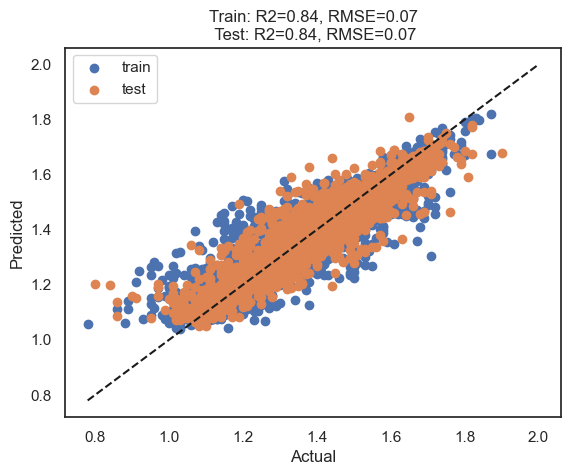

In [126]:
plt.scatter(train_y,model.predict(train_x),label="train")
r2=r2_score(train_y,model.predict(train_x))
mae=mean_absolute_error(train_y,model.predict(train_x))
rmse=np.sqrt(mean_squared_error(train_y,model.predict(train_x)))
string_=f"Train: R2={r2:0.2f}, RMSE={rmse:0.2f}"
plt.scatter(val_y,model.predict(val_x),label="test")
r2=r2_score(val_y,model.predict(val_x))
mae=mean_absolute_error(val_y,model.predict(val_x))
rmse=np.sqrt(mean_squared_error(val_y,model.predict(val_x)))
string_+=f"\n Test: R2={r2:0.2f}, RMSE={rmse:0.2f}"
plt.plot([0.78,2],[0.78,2],"--k")
plt.title(string_)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [127]:
model2 = tf.keras.Sequential([

	tf.keras.layers.Dense(units=32, activation='relu',
						input_shape=[784,])
	# tf.keras.layers.Dense(units=32, activation='relu'),
	# tf.keras.layers.Dense(units=16, activation='sigmoid'),
	# tf.keras.layers.Dense(units=1)
])
model2.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [128]:
model2 = tf.keras.Sequential([

	tf.keras.layers.Dense(units=32, activation='relu',
						input_shape=[784,]),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None)
	# tf.keras.layers.Dense(units=32, activation='relu'),
	# tf.keras.layers.Dense(units=16, activation='sigmoid'),
	# tf.keras.layers.Dense(units=1)
])
model2.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                25120     
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [129]:
model3 = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),

	tf.keras.layers.Dense(units=32, activation='relu'),
	tf.keras.layers.Dropout(rate=0.1, noise_shape=None, seed=None),
	tf.keras.layers.Dense(units=16, activation='sigmoid'),

	tf.keras.layers.Dense(units=1)
])
model3.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                3840      
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________


In [130]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model3.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae')


In [131]:
losses = model3.fit(train_x, train_y,

				validation_data=(val_x,val_y),
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=128,
				epochs=30, # total epoch

				)


Epoch 1/30
30/30 [==============================] - 0s 7ms/step - loss: 0.3433 - val_loss: 0.1475
Epoch 2/30
30/30 [==============================] - 0s 3ms/step - loss: 0.1373 - val_loss: 0.0999
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 0.1073 - val_loss: 0.0829
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0935 - val_loss: 0.0734
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0691
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0808 - val_loss: 0.0666
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0747 - val_loss: 0.0638
Epoch 8/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0708 - val_loss: 0.0631
Epoch 9/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0687 - val_loss: 0.0603
Epoch 10/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0657 - val_loss: 0.0598
Epoch 11/30
30/30 [

<AxesSubplot: >

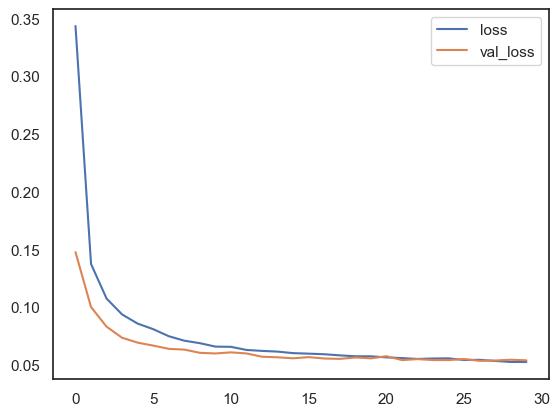

In [132]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()


52/52 [==============================] - 0s 1ms/step


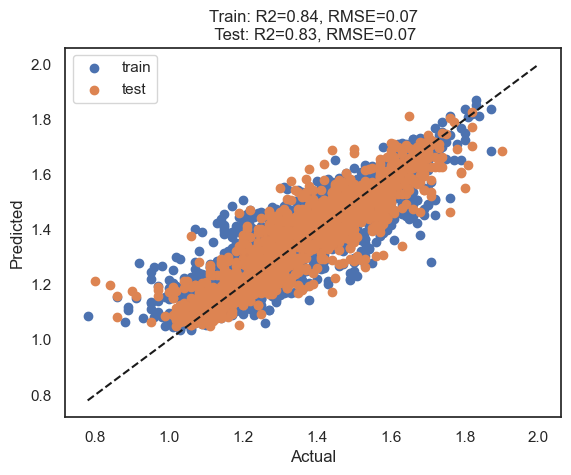

In [133]:
plt.scatter(train_y,model3.predict(train_x),label="train")
r2=r2_score(train_y,model3.predict(train_x))
mae=mean_absolute_error(train_y,model3.predict(train_x))
rmse=np.sqrt(mean_squared_error(train_y,model3.predict(train_x)))
string_=f"Train: R2={r2:0.2f}, RMSE={rmse:0.2f}"
plt.scatter(val_y,model3.predict(val_x),label="test")
r2=r2_score(val_y,model3.predict(val_x))
mae=mean_absolute_error(val_y,model3.predict(val_x))
rmse=np.sqrt(mean_squared_error(val_y,model3.predict(val_x)))
string_+=f"\n Test: R2={r2:0.2f}, RMSE={rmse:0.2f}"
plt.plot([0.78,2],[0.78,2],"--k")
plt.title(string_)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [134]:
print(val_x.shape,val_y.shape)
print(model3.predict(val_x).shape)

(1633, 59) (1633,)
52/52 [==============================] - 0s 1ms/step
(1633, 1)


# Dropout is one of the regularization technique